In [ ]:
!pip install transformers sentencepiece huggingface langchain

In [ ]:
# %cd /content/drive/MyDrive
# !git clone https://github.com/k-sashank/ml-nlgma-body-cam

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/ml-nlgma-body-cam/video_transcript/whisper_large/

/content/drive/MyDrive/ml-nlgma-body-cam/video_transcript/whisper_large


In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader, DirectoryLoader
from transformers import pipeline
from tqdm import tqdm
import re
import os
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)


In [ ]:
files = os.listdir("/content/drive/MyDrive/ml-nlgma-body-cam/video_transcript/whisper_large/")

In [ ]:
def extract_dialogues(text):
    # Regular expression pattern to match dialogues
    pattern = r'Speaker \d+: (.+)$'
    matches = re.findall(pattern, text, re.MULTILINE)

    return matches

In [ ]:
# %rm -rf /content/drive/MyDrive/ml-nlgma-body-cam/video_transcript/whisper_large/.ipynb_checkpoints/

In [ ]:
files

['AXON_Body_2_Video_2020-05-31_2055-002_large.srt']

In [ ]:
processed_files = []
emotion = []
for f in files:
  temp = open(f).read()
  temp = extract_dialogues(temp)
  for i in tqdm(temp):
    processed_files.append(i)
    label = classifier(i)[0][0]['label']
    emotion.append(label)

100%|██████████| 341/341 [00:44<00:00,  7.67it/s]


In [ ]:
emotion_dict = Counter(emotion)

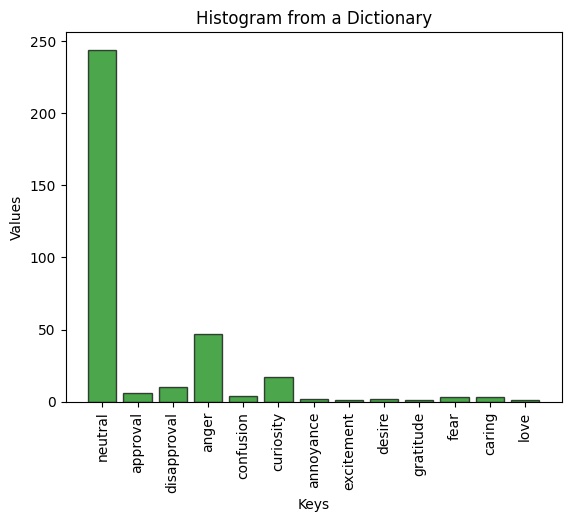

In [ ]:
keys = list(emotion_dict.keys())
values = list(emotion_dict.values())

# Create histogram (in this case, it's technically a bar chart because our data is categorical)
plt.bar(keys, values, alpha=0.7, color='green', edgecolor='black')

# Add title and labels
plt.title('Histogram from a Dictionary')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.xticks(rotation=90)

plt.show()

In [ ]:
emotion.index('approval')

3

In [ ]:
processed_files[3]

'Yeah, right.'

In [ ]:
# loader = DirectoryLoader('video_transcript/whisper_large', loader_cls=TextLoader)
# documents = loader.load()

# text_splitter = CharacterTextSplitter(chunk_size=10, chunk_overlap=10, keep_separator=False, separator= "\n")
# docs = text_splitter.split_documents(documents)

In [ ]:
f = open("video_transcript/whisper_large/AXON_Body_2_Video_2020-05-31_2055-002_large.srt").read()